## Exercício: Vetores como Representação de Dados

Considere o contexto de **produção industrial**, onde cada vetor representa a quantidade de produtos fabricados em uma linha de produção por dia.  
Cada vetor possui 3 atributos (features):

1. Número de **parafusos** produzidos  
2. Número de **porcas** produzidas  
3. Número de **arruelas** produzidas  

Dadas as seguintes produções:

$$
\text{dia}_A = \begin{bmatrix} 500 \\ 300 \\ 200 \end{bmatrix}, \quad
\text{dia}_B = \begin{bmatrix} 400 \\ 250 \\ 150 \end{bmatrix}, \quad
\text{dia}_C = \begin{bmatrix} 1000 \\ 600 \\ 400 \end{bmatrix}
$$

1. Calcule $\text{dia}_A + \text{dia}_B$.

2. Calcule $3 \cdot \text{dia}_B$.

3. Uma empresa deseja prever a produção em um **dia especial** que será uma mistura de 2 vezes o padrão do dia $A$ e 1 vez o padrão do dia $B$. Isso corresponde a calcular:  

   $$
   \mathbf{dia}_{especial} = 2 \cdot \mathbf{dia}_A + 1 \cdot \mathbf{dia}_B
   $$

Calcule o vetor resultante dessa combinação linear.

In [29]:
import numpy as np

diaA = np.array([500, 300, 200])
diaB = np.array([400, 250, 150])
diaC = np.array([1000, 600, 400])

soma = diaA + diaB
print("dia A + dia B =", soma)

mult = 3 * diaB
print("3 * dia B =", mult)

diaEspecial = 2 * diaA + diaB
print("dia especial =", diaEspecial)

dia A + dia B = [900 550 350]
3 * dia B = [1200  750  450]
dia especial = [1400  850  550]


**Cenário: Perfil de Recomendação de Músicas**

Um sistema de streaming caracteriza músicas por `energia` e `dançabilidade` (valores de 0 a 1). O gosto de um usuário, "Bia", é representado por um vetor de preferência  

$$
\mathbf{p} = [0.8, \, 0.3],
$$

indicando que ela gosta de músicas energéticas, mas não tão dançantes.

1. **Normalização dos Vetores**  
   Calcule a norma de cada vetor ($\mathbf{p}, \mathbf{m}_A, \mathbf{m}_B$) e normalize-os dividindo cada vetor pela sua norma.  
   - Música A (Rock): $$\mathbf{m}_A = [0.9, \, 0.2]$$  
   - Música B (Pop): $$\mathbf{m}_B = [0.7, \, 0.9]$$  

   Compare os vetores originais e os normalizados: houve mudanças relevantes de interpretação?
   

In [30]:
import numpy as np

p = np.array([0.8, 0.3])
ma = np.array([0.9, 0.2])
mb = np.array([0.7, 0.9])

# Norma (comprimento dos vetores)

norma_p = np.linalg.norm(p)
norma_ma = np.linalg.norm(ma)
norma_mb = np.linalg.norm(mb)

# Normalização

p_normalized = p/norma_p
ma_normalized = ma/norma_ma
mb_normalized = mb/norma_mb

print(f"Vetor orginal p = {p}, norma = {norma_p: .4f} e Vetor normalizado p = {p_normalized}")
print(f"Vetor orginal ma = {ma}, norma = {norma_ma: .4f} e Vetor normalizado ma = {ma_normalized}")
print(f"Vetor orginal mb = {mb}, norma = {norma_mb: .4f} e Vetor normalizado mb = {mb_normalized}")

print("Não houve mudança na interpretação qualitativa pois o gosto de Bia continua mais voltado para energia do que para dançabilidade.")
print("O Rock continua mais energético e o Pop continua mais equilibrado entre os dois atributos.")

Vetor orginal p = [0.8 0.3], norma =  0.8544 e Vetor normalizado p = [0.93632918 0.35112344]
Vetor orginal ma = [0.9 0.2], norma =  0.9220 e Vetor normalizado ma = [0.97618706 0.21693046]
Vetor orginal mb = [0.7 0.9], norma =  1.1402 e Vetor normalizado mb = [0.61394061 0.78935222]
Não houve mudança na interpretação qualitativa pois o gosto de Bia continua mais voltado para energia do que para dançabilidade.
O Rock continua mais energético e o Pop continua mais equilibrado entre os dois atributos.


2. **Alinhamento por Produto Interno**  
   Calcule o produto interno entre o vetor de preferência $\mathbf{p}$ e cada vetor de música:  

   $$
   \mathbf{p} \cdot \mathbf{m}_A, \quad \mathbf{p} \cdot \mathbf{m}_B
   $$

   Qual produto interno é maior? Com base apenas neste resultado, qual música o sistema deveria recomendar?

In [31]:
import numpy as np

# Vetores
p  = np.array([0.8, 0.3])
mA = np.array([0.9, 0.2])
mB = np.array([0.7, 0.9])

# Produtos internos
dot_p_mA = np.dot(p, mA)
dot_p_mB = np.dot(p, mB)

print("p · mA =", dot_p_mA)
print("p · mB =", dot_p_mB)

if dot_p_mA > dot_p_mB:
    print("Recomendação (com base apenas no produto interno): Música A (Rock)")
elif dot_p_mB > dot_p_mA:
    print("Recomendação (com base apenas no produto interno): Música B (Pop)")
else:
    print("Empate — os produtos internos são iguais.")

p · mA = 0.78
p · mB = 0.83
Recomendação (com base apenas no produto interno): Música B (Pop)


3. **Transformação de Perfil**  
   Para incentivar Bia a explorar novas músicas, o sistema aplica uma transformação que aumenta a preferência por dançabilidade:  

   $$
   T = \begin{pmatrix} 1 & 0 \\ 0.4 & 1 \end{pmatrix}
   $$

   Calcule o novo vetor de preferência de Bia:  

   $$
   \mathbf{p'} = T \mathbf{p}.
   $$

   Normalize $\mathbf{p'}$ e discuta como o vetor mudou em relação ao original. Qual aspecto do gosto foi reforçado?

In [32]:
import numpy as np

# Vetor original da Bia
p = np.array([0.8, 0.3])

# Matriz de transformação
T = np.array([[1, 0],
              [0.4, 1]])

# Novo vetor após transformação
p_transf = T @ p

# Normalização
p_transf_norm = p_transf / np.linalg.norm(p_transf)

print("Vetor original p:", p)
print("\n Vetor transformado p':", p_transf)
print("\n Vetor transformado e normalizado p:", p_transf_norm)
print("\n O sistema, ao aplicar 𝑇, aumentou o peso da dançabilidade sem reduzir tanto a energia, incentivando Bia a considerar músicas mais dançantes no seu perfil")

Vetor original p: [0.8 0.3]

 Vetor transformado p': [0.8  0.62]

 Vetor transformado e normalizado p: [0.79041505 0.61257167]

 O sistema, ao aplicar 𝑇, aumentou o peso da dançabilidade sem reduzir tanto a energia, incentivando Bia a considerar músicas mais dançantes no seu perfil


**Cenário: Similaridade em um Sistema de Recomendação**

Nos sistemas de recomendação modernos, raramente utilizamos atributos explícitos e criados por humanos, como `gênero=Ação` ou `diretor=Nolan`. Em vez disso, os algoritmos aprendem representações vetoriais densas tanto para usuários quanto para itens. Esses vetores são chamados de **embeddings**. As dimensões desses vetores, conhecidas como **features latentes**, não possuem um significado direto e interpretável para nós. Por exemplo, a 15ª dimensão do vetor de um filme não representa "nível de comédia", mas sim um padrão abstrato de características que o modelo descobriu ser útil para distinguir os gostos dos usuários.

Um sistema de recomendação representa filmes usando duas features latentes. Um filme assistido por um usuário servirá como referência para a próxima sugestão.

* Filme de Referência: `filme_ref = [0.95, 0.20]`
* Candidato A: `filme_A = [0.88, 0.25]`
* Candidato B: `filme_B = [0.48, 0.10]`

1. A **Distância Euclidiana** mede a "proximidade" geral entre os filmes neste espaço de features. Uma distância menor indica maior similaridade. Calcule a distância do `filme_ref` para cada candidato. Qual deles é o mais próximo?

In [33]:
import numpy as np

filme_ref = np.array([0.95, 0.20])
filme_A = np.array([0.88, 0.25])
filme_B = np.array([0.48, 0.10])

#Distância Euclidiana
dist_A = np.linalg.norm(filme_ref - filme_A)
dist_B = np.linalg.norm(filme_ref - filme_B)

print("Distância filme_ref → filme_A:", dist_A)
print("Distância filme_ref → filme_B:", dist_B)

# Determinar qual é mais próximo
if dist_A < dist_B:
    print("\n Filme mais próximo: Filme A")
else:
    print("\n Filme mais próximo: Filme B")

Distância filme_ref → filme_A: 0.08602325267042622
Distância filme_ref → filme_B: 0.48052055106935854

 Filme mais próximo: Filme A


2. A **Similaridade de Cosseno** mede se os filmes compartilham um "perfil" similar, ou seja, a mesma proporção entre as features, independentemente de suas magnitudes. Um valor próximo de 1 indica um perfil muito alinhado. Calcule a similaridade de cosseno do `filme_ref` para cada candidato. Qual deles tem o perfil mais similar? A recomendação seria a mesma usando esta métrica?

In [34]:
import numpy as np

# Vetores dos filmes
filme_ref = np.array([0.95, 0.20])
filme_A   = np.array([0.88, 0.25])
filme_B   = np.array([0.48, 0.10])

def cosine_similarity(u, v):
    dot_product = np.dot(u, v)
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    return dot_product / (norm_u * norm_v)

sim_A = cosine_similarity(filme_ref, filme_A)
sim_B = cosine_similarity(filme_ref, filme_B)

print(f"\n Similaridade entre filme_ref e filme_A: {sim_A:.4f}")
print(f"\n Similaridade entre filme_ref e filme_B: {sim_B:.4f}")

# Determinar qual perfil é mais similar
if sim_A > sim_B:
    print("\n Perfil mais similar: Filme A")
elif sim_B > sim_A:
    print("\n Perfil mais similar: Filme B")
else:
    print("\n Perfis igualmente similares")


 Similaridade entre filme_ref e filme_A: 0.9976

 Similaridade entre filme_ref e filme_B: 1.0000

 Perfil mais similar: Filme B


**Cenário: Monitoramento de Tráfego de API**

Uma equipe de engenharia de software monitora o uso de sua API, registrando o número de requisições de leitura (`GET`) e de escrita (`POST`) a cada hora durante um pico de uso.

* Hora 1: 1500 GETs, 400 POSTs
* Hora 2: 1800 GETs, 550 POSTs
* Hora 3: 1650 GETs, 480 POSTs
* Hora 4 (pico): 2500 GETs, 1200 POSTs

1. **Estruturação dos Logs:**  
a) Crie uma matriz de dados `api_log` no NumPy para organizar essa informação. As linhas devem representar as horas e as colunas os tipos de requisição.  
b) Imprima a matriz e seu `shape` para confirmar a estrutura.  

In [35]:
import numpy as np

api_log = np.array([
    [1500,  400],   # Hora 1
    [1800,  550],   # Hora 2
    [1650,  480],   # Hora 3
    [2500, 1200]    # Hora 4
])


print("Matriz api_log:\n", api_log)

# Conferir a forma da matriz
print("\nShape da matriz:", api_log.shape)

Matriz api_log:
 [[1500  400]
 [1800  550]
 [1650  480]
 [2500 1200]]

Shape da matriz: (4, 2)


2. **Análise de Performance:**  
Usando a matriz `api_log` e as funções do NumPy, responda às seguintes questões para o período monitorado:  
a) Qual foi o **número total** de requisições `GET` que o servidor processou?  
b) Qual foi a **média** de requisições `POST` por hora?  
c) Durante a Hora 4 (pico), qual foi o **tráfego total** (soma de GETs e POSTs) que a API recebeu?  

In [36]:
import numpy as np

api_log = np.array([
    [1500,  400],   # Hora 1
    [1800,  550],   # Hora 2
    [1650,  480],   # Hora 3
    [2500, 1200]    # Hora 4
])

# Número total de requisições GET
total_get = np.sum(api_log[:, 0])
print("a) Total de requisições GET:", total_get)

# Média de requisições POST por hora
media_post = np.mean(api_log[:, 1])
print("b) Média de requisições POST por hora:", media_post)

# Tráfego total na Hora 4
trafego_hora4 = np.sum(api_log[3, :])
print("c) Tráfego total na Hora 4:", trafego_hora4)

a) Total de requisições GET: 7450
b) Média de requisições POST por hora: 657.5
c) Tráfego total na Hora 4: 3700


**Cenário: Controle de Qualidade de Café**

Uma cooperativa de café usa uma máquina para classificar grãos com base em duas características medidas por um sensor óptico: `intensidade da cor` e `tamanho do grão`. Grãos de alta qualidade tendem a ter características diferentes dos grãos de baixa qualidade.

1. **Simulação e Visualização**

    a) Simule os dados de uma amostra de grãos. Use `make_blobs` para criar dois grupos de pontos:  

    * **Alta Qualidade:** 80 grãos, centrado em `[8, 5]` (cor, tamanho), com desvio padrão (`cluster_std`) de `0.8`.  
    * **Baixa Qualidade:** 40 grãos, centrado em `[4, 3]`, com desvio padrão de `0.6`.  

    b) Junte os dois grupos em uma única matriz de dados. (Dica: `np.vstack`).  

    c) Crie um gráfico de dispersão para todos os grãos (sem usar cores para diferenciar os grupos). Olhando para o gráfico, você consegue identificar visualmente os dois grupos de qualidade? Eles estão bem separados?

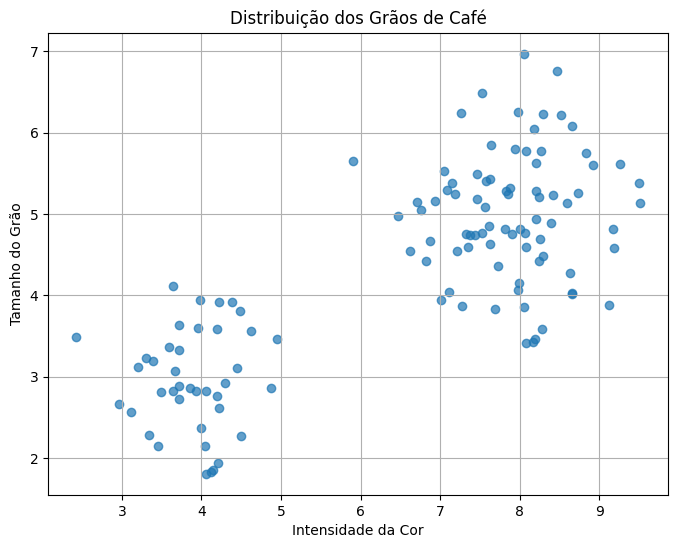

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Gerar os clusters de alta e baixa qualidade

# Alta Qualidade: 80 grãos
X_alta, _ = make_blobs(n_samples=80, centers=[[8, 5]], cluster_std=0.8, random_state=42)

# Baixa Qualidade: 40 grãos
X_baixa, _ = make_blobs(n_samples=40, centers=[[4, 3]], cluster_std=0.6, random_state=42)

# b) Juntar os dois grupos em uma matriz única
X_total = np.vstack([X_alta, X_baixa])

# c) Gráfico de dispersão
plt.figure(figsize=(8,6))
plt.scatter(X_total[:,0], X_total[:,1], alpha=0.7)
plt.xlabel("Intensidade da Cor")
plt.ylabel("Tamanho do Grão")
plt.title("Distribuição dos Grãos de Café")
plt.grid(True)
plt.show()


2. **Cálculo de Centroides e Distâncias**

    a) Calcule o **centroide** de cada grupo (Alta e Baixa Qualidade) usando a média das coordenadas de seus pontos.

    b) Plote os centroides no gráfico de dispersão anterior

Centroide Alta Qualidade: [7.89588326 4.99595393]
Centroide Baixa Qualidade: [3.89615047 2.95524135]


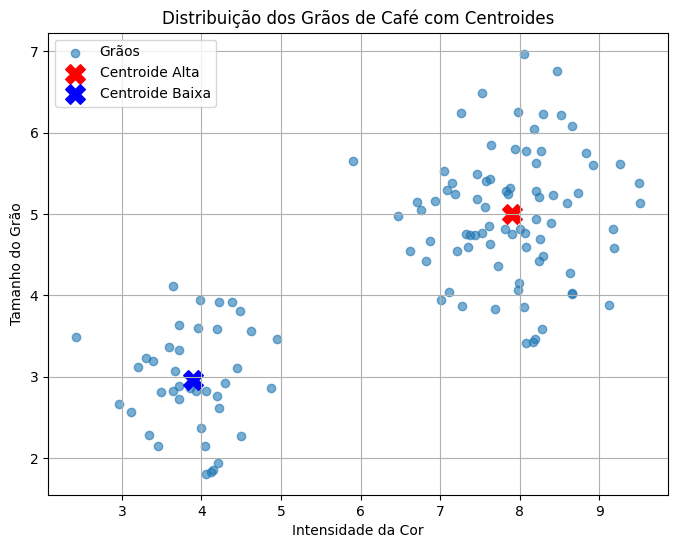

In [38]:
# Calcular os centroides
centroide_alta = np.mean(X_alta, axis=0)
centroide_baixa = np.mean(X_baixa, axis=0)

print("Centroide Alta Qualidade:", centroide_alta)
print("Centroide Baixa Qualidade:", centroide_baixa)

# Plotar os pontos e os centroides
plt.figure(figsize=(8,6))
plt.scatter(X_total[:,0], X_total[:,1], alpha=0.6, label='Grãos')
plt.scatter(centroide_alta[0], centroide_alta[1], color='red', marker='X', s=200, label='Centroide Alta')
plt.scatter(centroide_baixa[0], centroide_baixa[1], color='blue', marker='X', s=200, label='Centroide Baixa')
plt.xlabel("Intensidade da Cor")
plt.ylabel("Tamanho do Grão")
plt.title("Distribuição dos Grãos de Café com Centroides")
plt.legend()
plt.grid(True)
plt.show()

3. **Tomada de Decisão**

    a) Um novo grão passa pelo sensor e registra as medições:

    $$
    \text{novo\_grao} = [7.5, \, 4.8]
    $$

    b) Adicione este novo ponto ao seu gráfico, mas com uma cor e um marcador diferentes (por exemplo, um 'X' vermelho e maior) para destacá-lo.  

    c) Calcule a **distância euclidiana** do novo grão até cada centroide.  

    $$
    d(\mathbf{x}, \mathbf{c}) = \sqrt{(x_1 - c_1)^2 + (x_2 - c_2)^2}
    $$

    d) Escreva uma função `classificar_ponto` que receba as coordenadas de um ponto e uma lista de centroides, calcule as distâncias e retorne o rótulo do cluster mais próximo (Alta ou Baixa Qualidade).

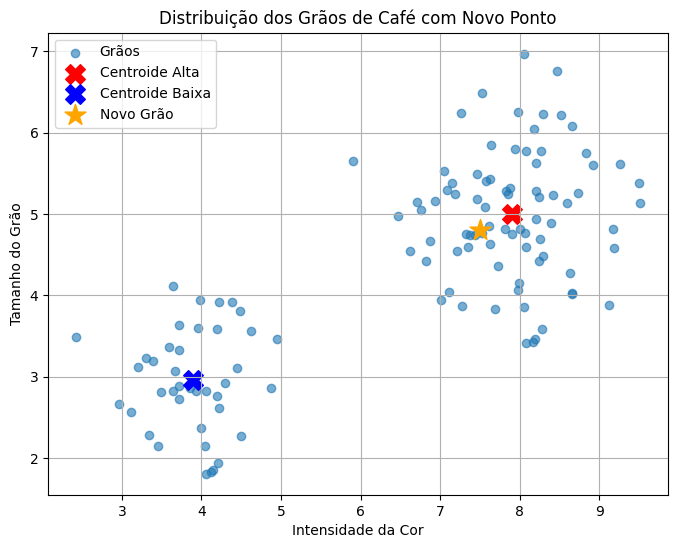

Distância ao centroide Alta Qualidade: 0.44172558846917165
Distância ao centroide Baixa Qualidade: 4.048563439258104

O novo grão é classificado como: Alta Qualidade


In [39]:
centroides = [centroide_alta, centroide_baixa]

# --- Novo grão ---
novo_grao = np.array([7.5, 4.8])

# Plotar todos os pontos e os centroides
plt.figure(figsize=(8,6))
plt.scatter(X_total[:,0], X_total[:,1], alpha=0.6, label='Grãos')
plt.scatter(centroide_alta[0], centroide_alta[1], color='red', marker='X', s=200, label='Centroide Alta')
plt.scatter(centroide_baixa[0], centroide_baixa[1], color='blue', marker='X', s=200, label='Centroide Baixa')
plt.scatter(novo_grao[0], novo_grao[1], color='orange', marker='*', s=250, label='Novo Grão')  # novo ponto
plt.xlabel("Intensidade da Cor")
plt.ylabel("Tamanho do Grão")
plt.title("Distribuição dos Grãos de Café com Novo Ponto")
plt.legend()
plt.grid(True)
plt.show()

# Calcular distâncias do novo grão a cada centroide
dist_alta = np.linalg.norm(novo_grao - centroide_alta)
dist_baixa = np.linalg.norm(novo_grao - centroide_baixa)

print("Distância ao centroide Alta Qualidade:", dist_alta)
print("Distância ao centroide Baixa Qualidade:", dist_baixa)

# Função para classificar ponto
def classificar_ponto(ponto, centroides, labels=['Alta Qualidade', 'Baixa Qualidade']):
    distancias = [np.linalg.norm(ponto - c) for c in centroides]
    indice_min = np.argmin(distancias)
    return labels[indice_min]

# Classificar o novo grão
rotulo = classificar_ponto(novo_grao, centroides)
print("\nO novo grão é classificado como:", rotulo)